# Feedforward Network using Tensorflow

In [257]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generating a dataset

Let's start by generating a dataset we can play with. Fortunately, [scikit-learn](http://scikit-learn.org/) has some useful dataset generators, so we don't need to write the code ourselves. We will go with the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.

(200, 2) (200,)


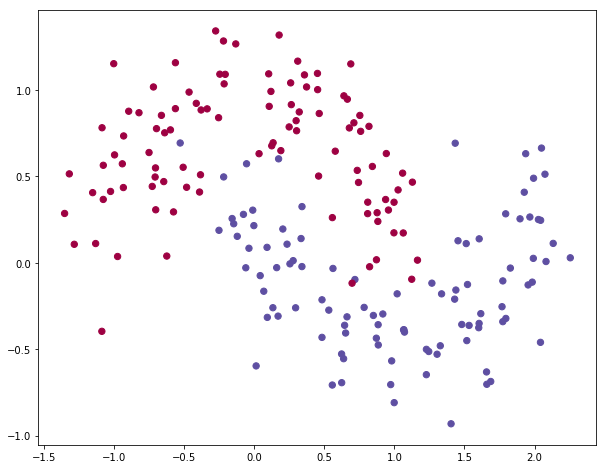

In [258]:
# Generate a dataset and plot it
np.random.seed(0)
Xt, yt = sklearn.datasets.make_moons(200, noise=0.20)
print(Xt.shape, yt.shape)
plt.scatter(Xt[:,0], Xt[:,1], s=40, c=yt, cmap=plt.cm.Spectral)

In [259]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [260]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

In [261]:
def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

In [262]:
y_t = np.array([[0,1] if i == 0 else [1,0] for i in yt])
train_X, test_X, train_y, test_y = Xt, Xt, y_t, y_t

In [263]:
def build_model(nn_hdim=256, epochs=20, print_loss=False):

    # Layer's sizes
    x_size = train_X.shape[1] 
    h_size = nn_hdim                # Number of hidden nodes
    y_size = 2   

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(epochs):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))
        if print_loss:
            print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
                  % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
    return test_accuracy

sess = tf.Session() # need to deal with sessions
build_model(3, 50,print_loss=True)

Epoch = 1, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 2, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 3, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 4, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 5, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 6, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 7, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 8, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 9, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 10, train accuracy = 50.00%, test accuracy = 50.00%
Epoch = 11, train accuracy = 50.50%, test accuracy = 50.50%
Epoch = 12, train accuracy = 65.50%, test accuracy = 65.50%
Epoch = 13, train accuracy = 75.00%, test accuracy = 75.00%
Epoch = 14, train accuracy = 77.00%, test accuracy = 77.00%
Epoch = 15, train accuracy = 76.50%, test accuracy = 76.50%
Epoch = 16, train accuracy = 76.50%, test accuracy = 76.50%
Epoch = 17, train accuracy = 76.00%, test accurac

0.835

# Varying the hidden layer size

In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.


In [265]:
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    sess = tf.Session()
    print(nn_hdim, build_model(nn_hdim,print_loss=False))
    sess.close()
plt.show()

1 0.5
2 0.785
3 0.815
4 0.81
5 0.83
20 0.83
50 0.83


# Exercises

Here are some things you can try to become more familiar with the code:

1. Instead of batch gradient descent, use minibatch gradient descent ([more info](http://cs231n.github.io/optimization-1/#gd)) to train the network. Minibatch gradient descent typically performs better in practice. 
2. We used a fixed learning rate $\epsilon$ for gradient descent. Implement an annealing schedule for the gradient descent learning rate ([more info](http://cs231n.github.io/neural-networks-3/#anneal)). 
3. We used a $\tanh$ activation function for our hidden layer. Experiment with other activation functions (some are mentioned above). Note that changing the activation function also means changing the backpropagation derivative.
4. Extend the network from two to three classes. You will need to generate an appropriate dataset for this.
5. Extend the network to four layers. Experiment with the layer size. Adding another hidden layer means you will need to adjust both the forward propagation as well as the backpropagation code.
